# Yash Meshram
# The Spark Foundation
# Data Science & Business Analytics

# Task
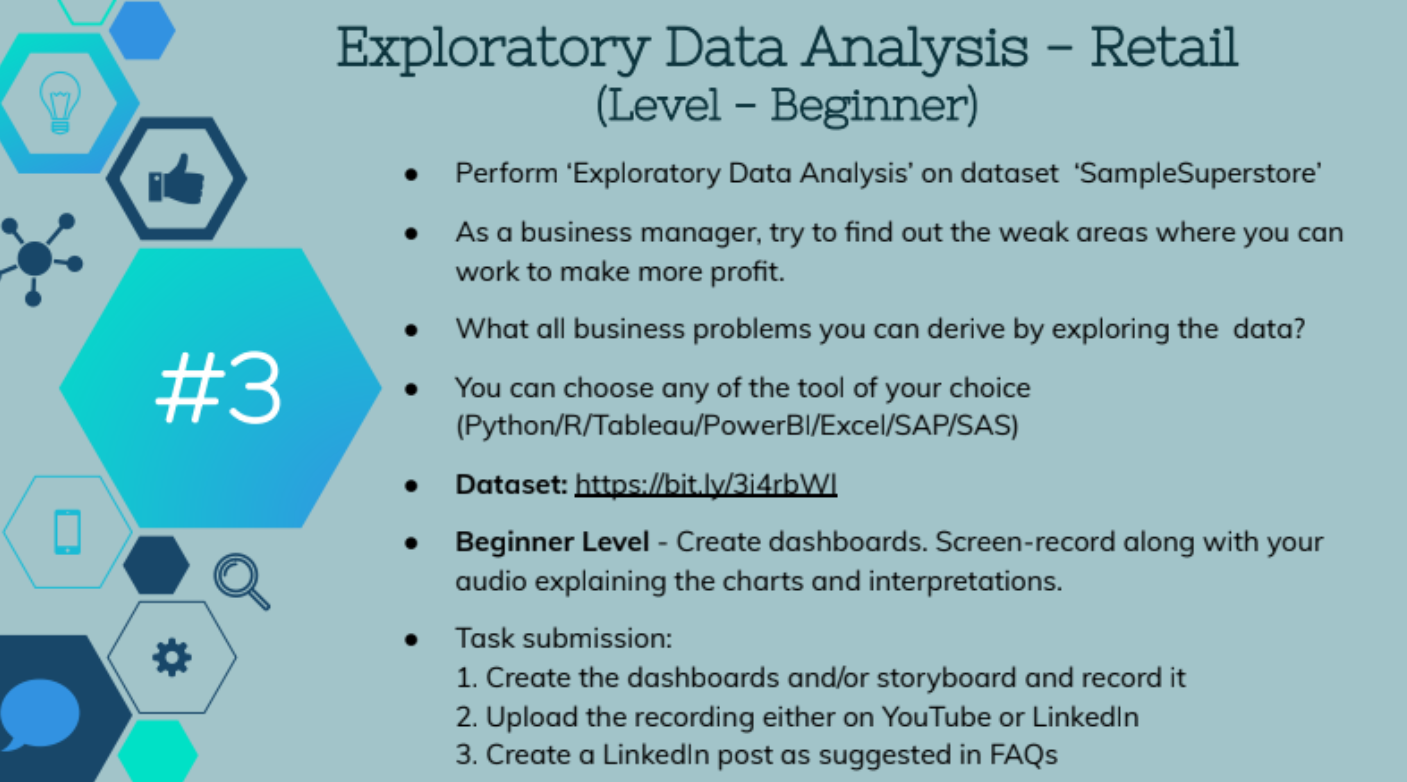

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('default')

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:
df['Sales'] = df['Sales']/df['Quantity']
df['Profit'] = df['Profit']/df['Quantity']
df = df.drop(['Postal Code', 'Quantity', 'Country'],axis='columns')
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,130.9800,0.00,20.9568
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,243.9800,0.00,73.1940
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,7.3100,0.00,3.4357
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,191.5155,0.45,-76.6062
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,11.1840,0.20,1.2582
...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,8.4160,0.20,1.3676
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,45.9800,0.00,7.8166
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,129.2880,0.20,9.6966
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,7.4000,0.00,3.3300


# Segment based Profit analysis

               Profit
Segment              
Consumer     6.958733
Corporate    8.051993
Home Office  9.818913


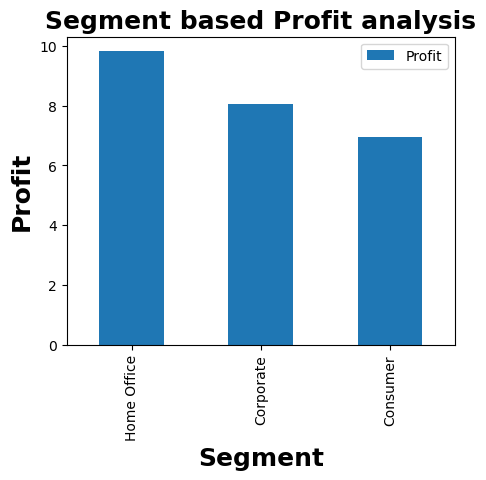

In [5]:
data = df.groupby(['Segment'])[['Profit']].mean()
print(data)

category_profit = data.sort_values('Profit', ascending=False)
category_profit[['Profit']].plot(kind = 'bar', figsize = (5,4))
plt.title('Segment based Profit analysis', fontsize = 18, fontweight = 'bold')
plt.xlabel('Segment', fontsize = 18, fontweight = 'bold')
plt.ylabel('Profit', fontsize = 18, fontweight = 'bold')
plt.show()

                   Profit
Ship Mode                
First Class     12.850480
Same Day        10.270091
Second Class    11.558937
Standard Class   8.454446


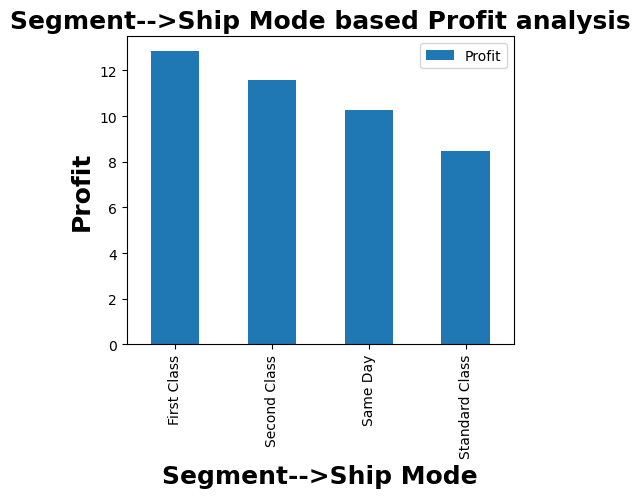

In [6]:
for key, subdf in df.groupby('Segment'):
    if key == 'Home Office':        
        data = subdf.groupby(['Ship Mode'])[['Profit']].mean()
        print(data)
        
        category_profit = data.sort_values('Profit', ascending=False)
        category_profit[['Profit']].plot(kind = 'bar', figsize = (5,4))
        plt.title('Segment-->Ship Mode based Profit analysis', fontsize = 18, fontweight = 'bold')
        plt.xlabel('Segment-->Ship Mode', fontsize = 18, fontweight = 'bold')
        plt.ylabel('Profit', fontsize = 18, fontweight = 'bold')
        plt.show()

# Region based Profit analysis

           Profit
Region           
Central  4.561411
East     8.642622
South    8.224975
West     9.182679


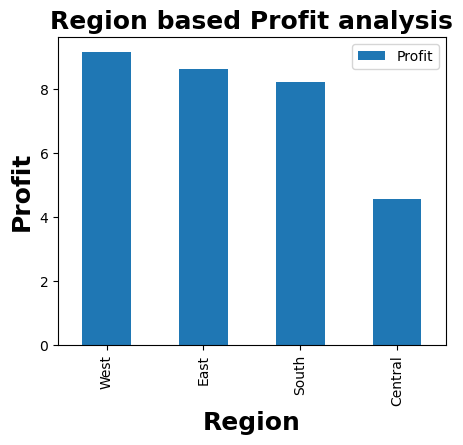

In [7]:
# Analysis of Profit
data = df.groupby(['Region'])[['Profit']].mean()
print(data)

# Visualise
category_profit = data.sort_values('Profit', ascending=False)
category_profit[['Profit']].plot(kind = 'bar', figsize = (5,4))
plt.title('Region based Profit analysis', fontsize = 18, fontweight = 'bold')
plt.xlabel('Region', fontsize = 18, fontweight = 'bold')
plt.ylabel('Profit', fontsize = 18, fontweight = 'bold')
plt.show()

               Profit
State                
Arizona     -3.237727
California  10.312735
Colorado    -7.277126
Idaho       13.592152
Montana     28.391327
Nevada      23.863438
New Mexico   7.791251
Oregon      -3.951598
Utah        12.693436
Washington  17.169893
Wyoming     25.049000


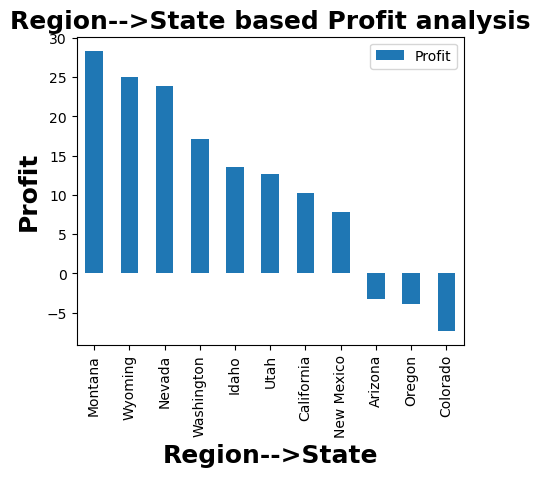

In [8]:
for key, subdf in df.groupby('Region'):
    if key == 'West':
        data = subdf.groupby(['State'])[['Profit']].mean()
        print(data)
        
        category_profit = data.sort_values('Profit', ascending=False)
        category_profit[['Profit']].plot(kind = 'bar', figsize = (5,4))
        plt.title('Region-->State based Profit analysis', fontsize = 18, fontweight = 'bold')
        plt.xlabel('Region-->State', fontsize = 18, fontweight = 'bold')
        plt.ylabel('Profit', fontsize = 18, fontweight = 'bold')
        plt.show()

                Profit
City                  
Billings      1.346800
Bozeman       4.041050
Great Falls  40.814012
Helena        4.560467
Missoula     76.247500


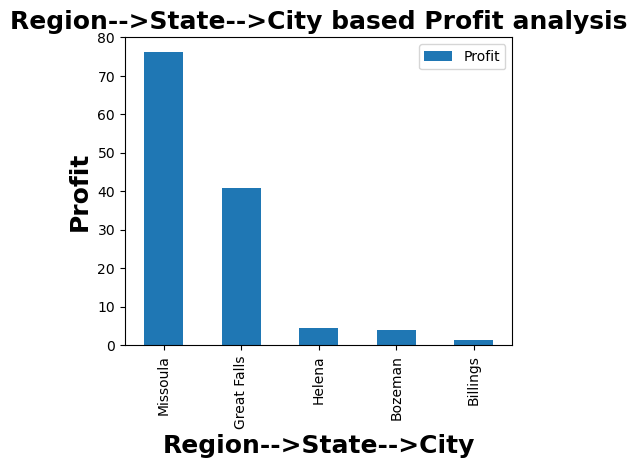

In [9]:
for key, subdf in df.groupby('State'):
    if key == 'Montana':
        data = subdf.groupby(['City'])[['Profit']].mean()
        print(data)
        
        category_profit = data.sort_values('Profit', ascending=False)
        category_profit[['Profit']].plot(kind = 'bar', figsize = (5,4))
        plt.title('Region-->State-->City based Profit analysis', fontsize = 18, fontweight = 'bold')
        plt.xlabel('Region-->State-->City', fontsize = 18, fontweight = 'bold')
        plt.ylabel('Profit', fontsize = 18, fontweight = 'bold')
        plt.show()

# Category based Profit analysis

                    Profit
Category                  
Furniture         1.935615
Office Supplies   5.819061
Technology       20.993948


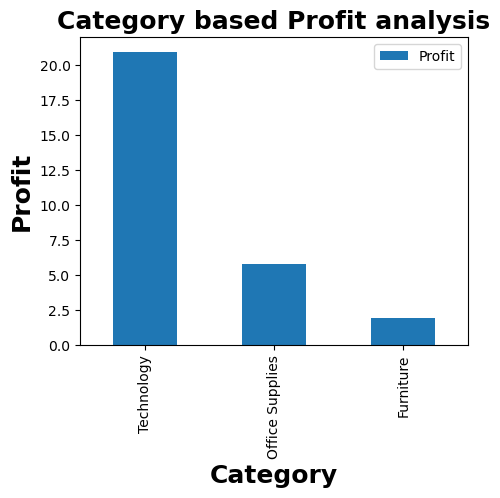

In [10]:
# Analysis of Profit
data = df.groupby(['Category'])[['Profit']].mean()
print(data)

# Visualise
category_profit = data.sort_values('Profit', ascending=False)
category_profit[['Profit']].plot(kind = 'bar', figsize = (5,4))
plt.title('Category based Profit analysis', fontsize = 18, fontweight = 'bold')
plt.xlabel('Category', fontsize = 18, fontweight = 'bold')
plt.ylabel('Profit', fontsize = 18, fontweight = 'bold')
plt.show()

                  Profit
Sub-Category            
Accessories    14.132006
Copiers       219.210450
Machines        5.435072
Phones         13.826966


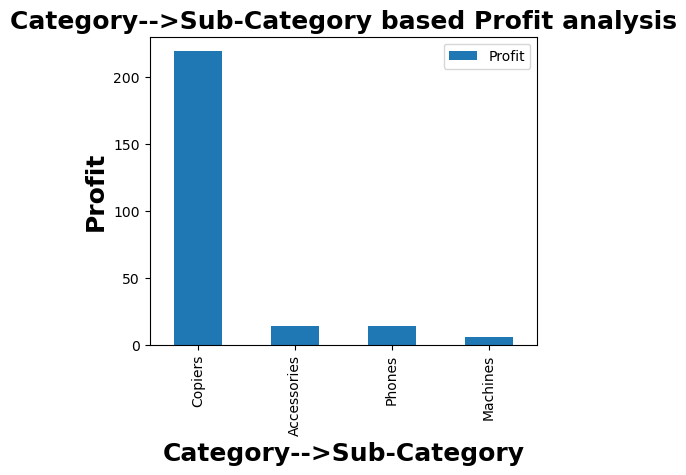

In [11]:
for key, subdf in df.groupby('Category'):
    if key == 'Technology':
        data = subdf.groupby(['Sub-Category'])[['Profit']].mean()
        print(data)
        
        category_profit = data.sort_values('Profit', ascending=False)
        category_profit[['Profit']].plot(kind = 'bar', figsize = (5,4))
        plt.title('Category-->Sub-Category based Profit analysis', fontsize = 18, fontweight = 'bold')
        plt.xlabel('Category-->Sub-Category', fontsize = 18, fontweight = 'bold')
        plt.ylabel('Profit', fontsize = 18, fontweight = 'bold')
        plt.show()

# Discount based Profit analysis

             Profit
Discount           
0.00      17.576279
0.10      24.817315
0.15       6.355342
0.20       6.805005
0.30     -12.646066
0.32     -21.559530
0.40     -28.028501
0.45     -59.587091
0.50     -82.380409
0.60     -11.056930
0.70     -23.841988
0.80     -23.740885


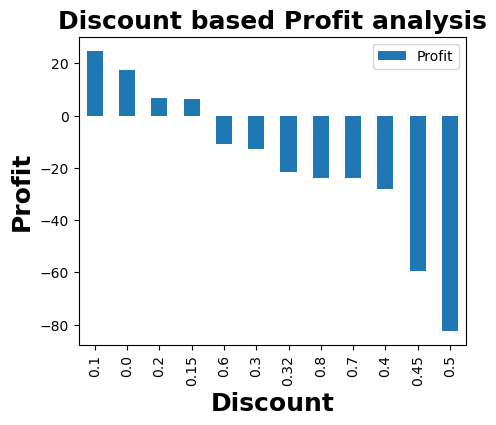

In [12]:
# Analysis of Profit
data = df.groupby(['Discount'])[['Profit']].mean()
print(data)

# Visualise
category_profit = data.sort_values('Profit', ascending=False)
category_profit[['Profit']].plot(kind = 'bar', figsize = (5,4))
plt.title('Discount based Profit analysis', fontsize = 18, fontweight = 'bold')
plt.xlabel('Discount', fontsize = 18, fontweight = 'bold')
plt.ylabel('Profit', fontsize = 18, fontweight = 'bold')
plt.show()

# From all the above graphs we can conclude that the following parameters will give us maximum Profit:

# -------------------------------------------
# Segment: Home Office
# Ship Mode : First Class
# --------------------------------------------
# Region :West
# State : Montana
# City : Missoula
# --------------------------------------------
# Category : Technology
# Sub-Category : Copiers
# --------------------------------------------
# Discount : 0.10